In [1]:
import pandas as pd

# Load the datasets
file_paths = {
    'fitness_analysis': 'C:/Users/Armel/OneDrive/Documents/Glacier work/Group project/fitness_analysis.csv',
    'fitness_consumer': 'C:/Users/Armel/OneDrive/Documents/Glacier work/Group project/fitness_consumer.csv',
    'fitness_trackers': 'C:/Users/Armel/OneDrive/Documents/Glacier work/Group project/fitness_trackers.csv'
}

datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [2]:
# Standardize column names for merging
fitness_analysis = datasets['fitness_analysis'].rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
fitness_consumer = datasets['fitness_consumer'].rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
fitness_trackers = datasets['fitness_trackers'].rename(columns=lambda x: x.strip().lower().replace(' ', '_'))

In [3]:
# Create unique identifiers for each row in each dataset
fitness_analysis['unique_id'] = range(1, len(fitness_analysis) + 1)
fitness_consumer['unique_id'] = range(1, len(fitness_consumer) + 1)

In [4]:
# Merge the datasets based on the unique identifier
merged_data = pd.merge(fitness_analysis, fitness_consumer, on='unique_id', how='outer', suffixes=('_analysis', '_consumer'))

In [5]:
# Encode categorical variables to numeric values for correlation analysis
fitness_level_mapping = {
    'Very good': 5,
    'Good': 4,
    'Average': 3,
    'Unfit': 2,
    'Very unfit': 1
}

exercise_frequency_mapping = {
    'Everyday': 5,
    '5 to 6 times a week': 4,
    '3 to 4 times a week': 3,
    '1 to 2 times a week': 2,
    'Never': 1
}

motivation_mapping = {
    'Strongly agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}

health_perception_mapping = {
    'Very healthy': 5,
    'Healthy': 4,
    'Average': 3,
    'Unhealthy': 2,
    'Very unhealthy': 1
}

In [6]:
# Apply the mappings to the correlation data
correlation_data = merged_data[[
    'how_do_you_describe_your_current_level_of_fitness_?',
    'how_important_is_exercise_to_you_?',
    'has_the_fitness_wearable_helped_you_stay_motivated_to_exercise?',
    'how_often_do_you_exercise?'
]]

In [7]:
correlation_data['fitness_level_numeric'] = correlation_data['how_do_you_describe_your_current_level_of_fitness_?'].map(fitness_level_mapping)
correlation_data['exercise_frequency_numeric'] = correlation_data['how_often_do_you_exercise?'].map(exercise_frequency_mapping)
correlation_data['motivation_numeric'] = correlation_data['has_the_fitness_wearable_helped_you_stay_motivated_to_exercise?'].map(motivation_mapping)

C:\Users\Armel\AppData\Local\Temp\ipykernel_19612\1841711677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['fitness_level_numeric'] = correlation_data['how_do_you_describe_your_current_level_of_fitness_?'].map(fitness_level_mapping)
C:\Users\Armel\AppData\Local\Temp\ipykernel_19612\1841711677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['exercise_frequency_numeric'] = correlation_data['how_often_do_you_exercise?'].map(exercise_frequency_mapping)
C:\Users\Armel\

In [8]:
# Calculate the correlation matrix
correlation_matrix = correlation_data[['fitness_level_numeric', 'exercise_frequency_numeric', 'motivation_numeric']].corr()

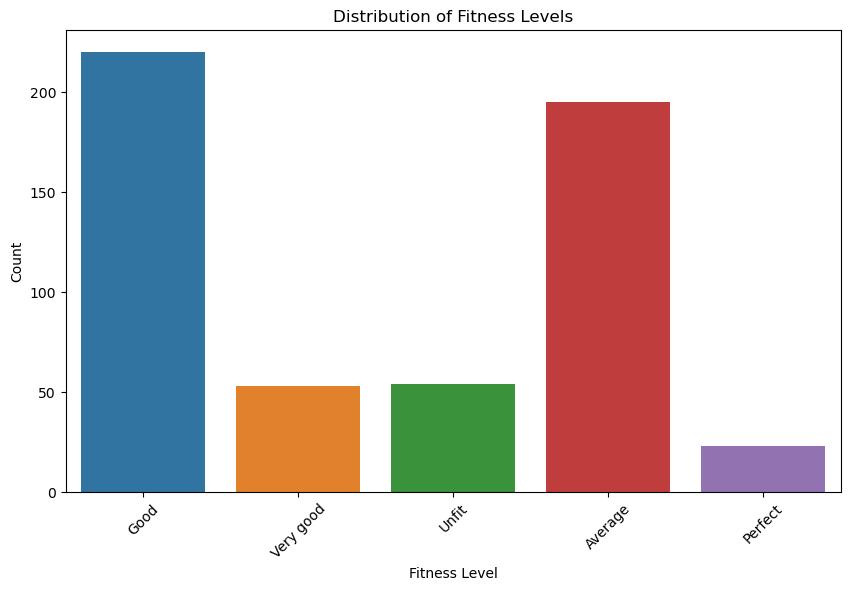

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Fitness Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='how_do_you_describe_your_current_level_of_fitness_?')
plt.title('Distribution of Fitness Levels')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show() 

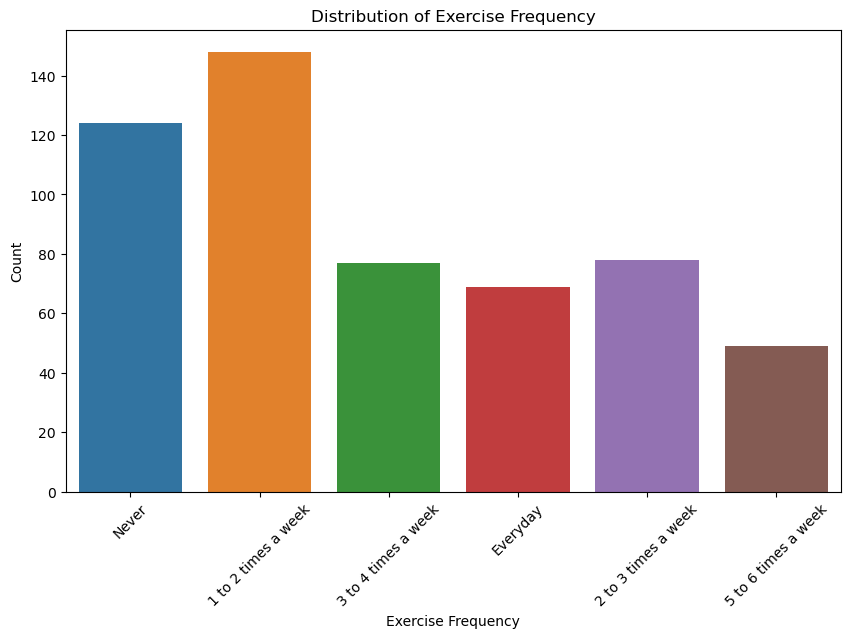

In [10]:
# Visualization 2: Distribution of Exercise Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='how_often_do_you_exercise?')
plt.title('Distribution of Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

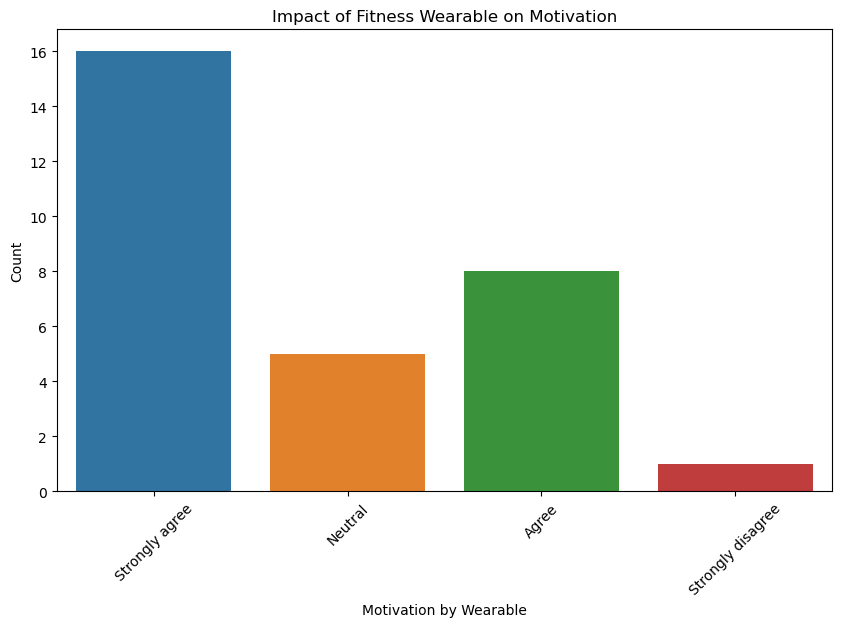

In [11]:
# Visualization 3: Impact of Fitness Wearable on Motivation
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='has_the_fitness_wearable_helped_you_stay_motivated_to_exercise?')
plt.title('Impact of Fitness Wearable on Motivation')
plt.xlabel('Motivation by Wearable')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

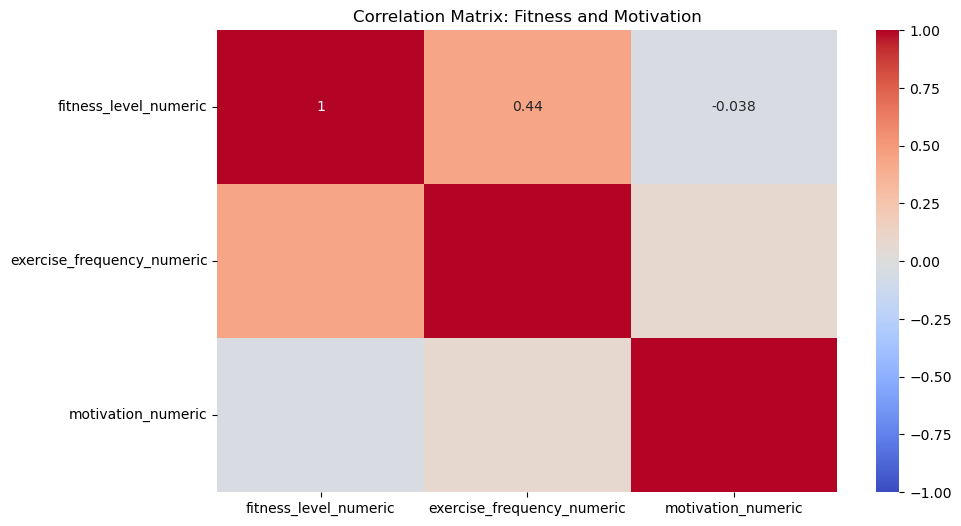

In [12]:
# Visualization 4: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Fitness and Motivation')
plt.show()

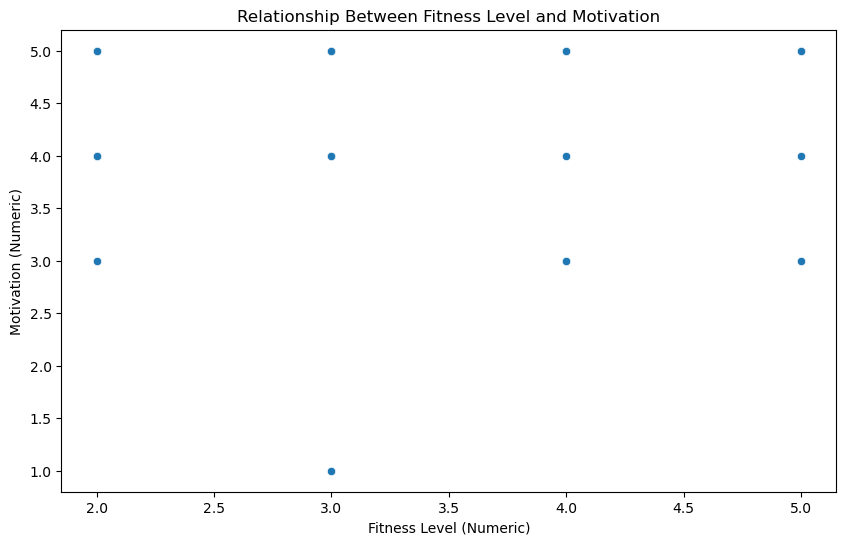

In [13]:
# Hypothesis 1: Relationship Between Fitness Level and Motivation
# Individuals with higher fitness levels are more likely to be motivated by fitness wearables.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'fitness_analysis' and 'fitness_consumer' have been cleaned and merged into 'merged_data'

merged_data['fitness_level_numeric'] = merged_data['how_do_you_describe_your_current_level_of_fitness_?'].map(fitness_level_mapping)
merged_data['motivation_numeric'] = merged_data['has_the_fitness_wearable_helped_you_stay_motivated_to_exercise?'].map(motivation_mapping)

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='fitness_level_numeric', y='motivation_numeric')
plt.title('Relationship Between Fitness Level and Motivation')
plt.xlabel('Fitness Level (Numeric)')
plt.ylabel('Motivation (Numeric)')
plt.show()


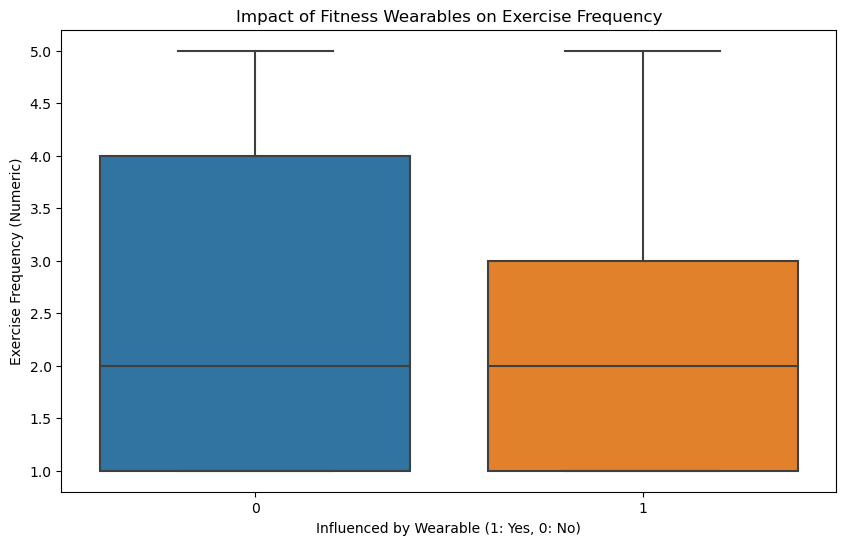

In [14]:
# Hypothesis 2: Impact of Fitness Wearables on Exercise Frequency
# The use of fitness wearables increases the frequency of exercise among users.

# Encode exercise frequency for analysis
exercise_frequency_mapping = {
    'Everyday': 5,
    '5 to 6 times a week': 4,
    '3 to 4 times a week': 3,
    '1 to 2 times a week': 2,
    'Never': 1
}

merged_data['exercise_frequency_numeric'] = merged_data['how_often_do_you_exercise?'].map(exercise_frequency_mapping)
merged_data['influenced_by_wearable'] = merged_data['has_using_a_fitness_wearable_influenced_your_decision?_[to_exercise_more?]'].map(lambda x: 1 if x in ['Agree', 'Strongly agree'] else 0)

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='influenced_by_wearable', y='exercise_frequency_numeric')
plt.title('Impact of Fitness Wearables on Exercise Frequency')
plt.xlabel('Influenced by Wearable (1: Yes, 0: No)')
plt.ylabel('Exercise Frequency (Numeric)')
plt.show()


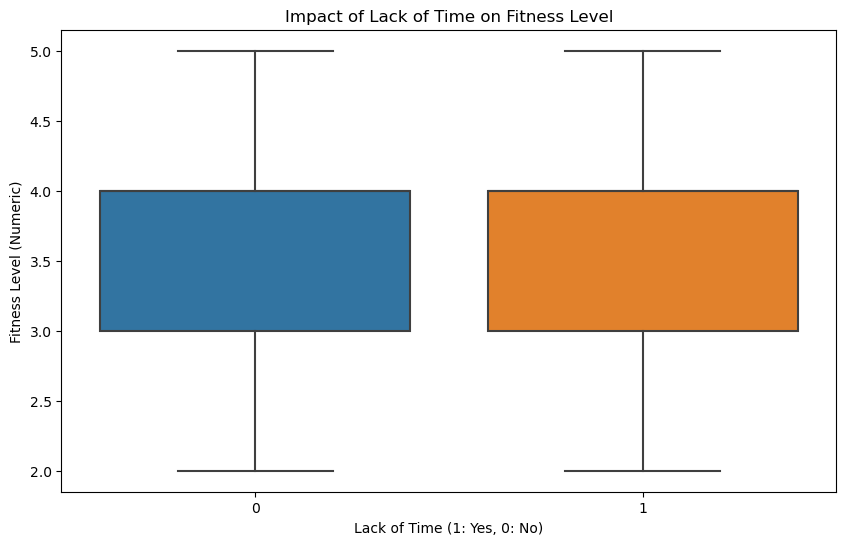

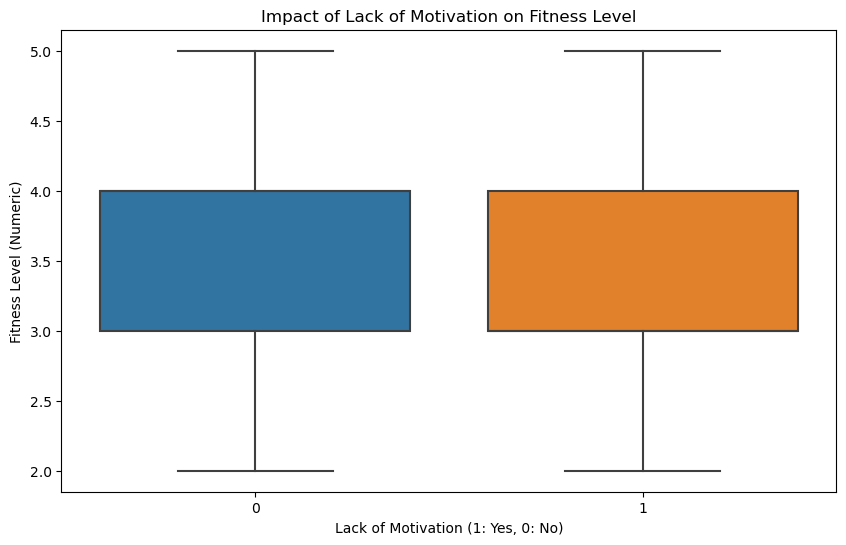

In [15]:
# Hypothesis 3: Barriers to Exercise and Their Impact on Fitness Level
# Common barriers to exercise, such as lack of time and motivation, are associated with lower fitness levels.

# Create a flag for common barriers
merged_data['barrier_lack_of_time'] = merged_data['what_barriers,_if_any,_prevent_you_from_exercising_more_regularly?___________(please_select_all_that_apply)'].apply(lambda x: 1 if 'I don\'t have enough time' in str(x) else 0)
merged_data['barrier_lack_of_motivation'] = merged_data['what_barriers,_if_any,_prevent_you_from_exercising_more_regularly?___________(please_select_all_that_apply)'].apply(lambda x: 1 if 'I can\'t stay motivated' in str(x) else 0)

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='barrier_lack_of_time', y='fitness_level_numeric')
plt.title('Impact of Lack of Time on Fitness Level')
plt.xlabel('Lack of Time (1: Yes, 0: No)')
plt.ylabel('Fitness Level (Numeric)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='barrier_lack_of_motivation', y='fitness_level_numeric')
plt.title('Impact of Lack of Motivation on Fitness Level')
plt.xlabel('Lack of Motivation (1: Yes, 0: No)')
plt.ylabel('Fitness Level (Numeric)')
plt.show()


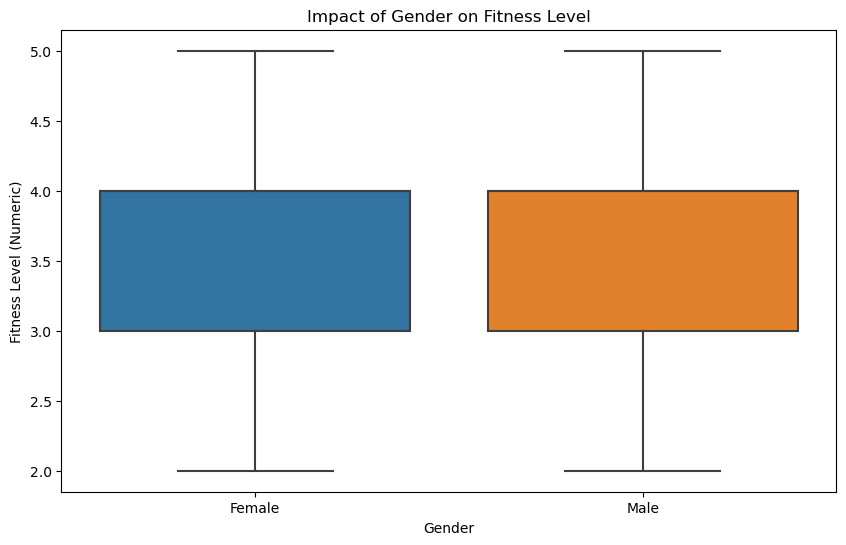

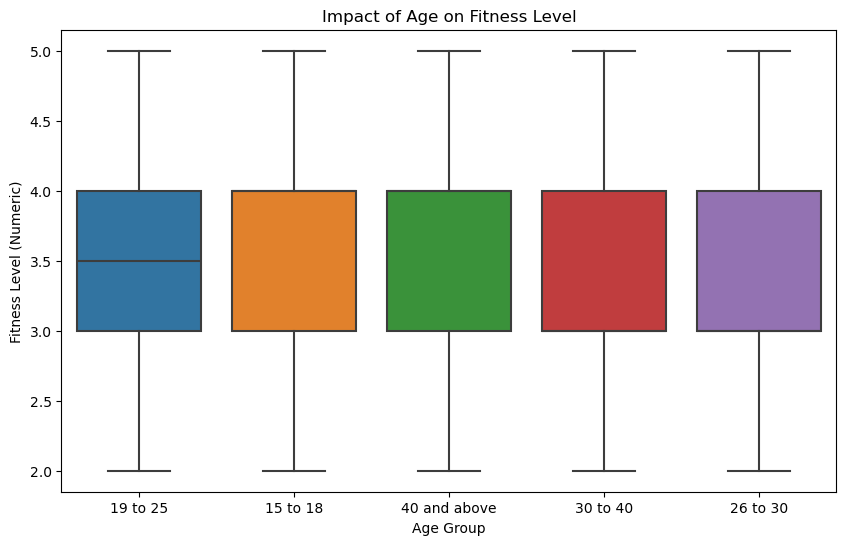

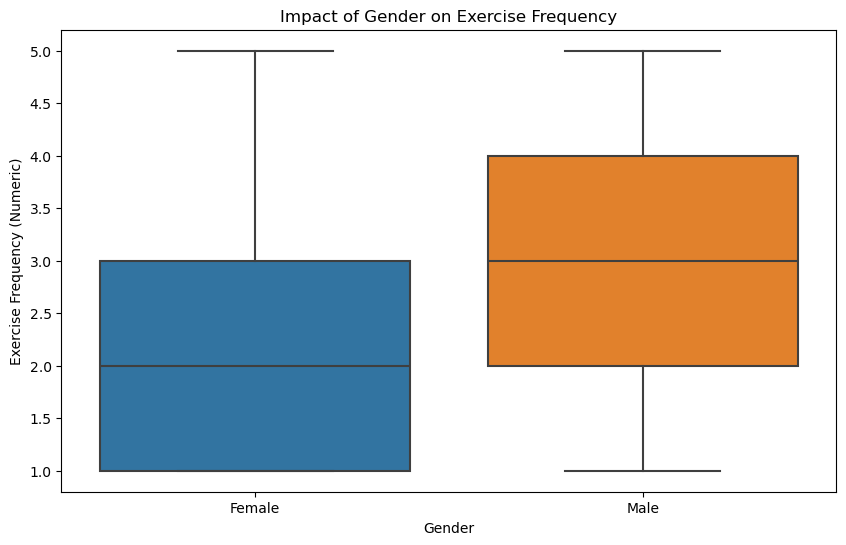

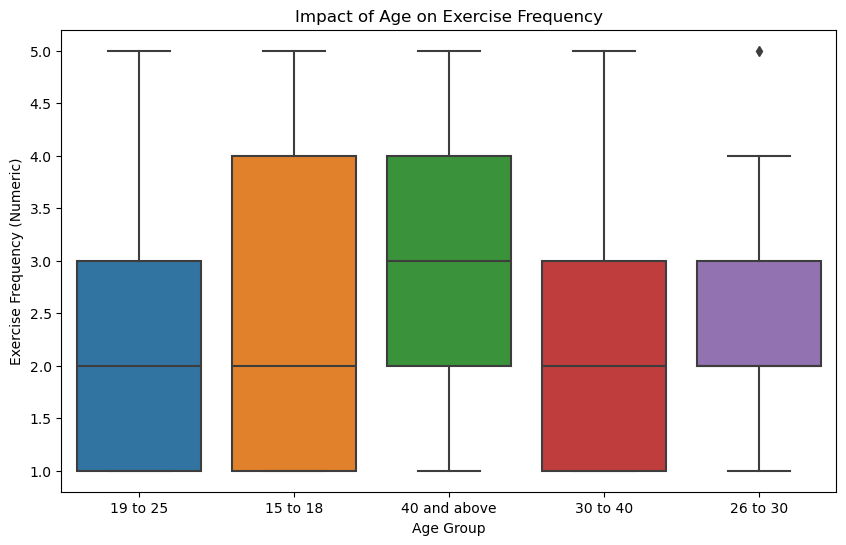

In [16]:
# Hypothesis 4: Influence of Demographics on Fitness and Exercise Habits
# Age and gender significantly influence fitness levels and exercise habits.

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='your_gender', y='fitness_level_numeric')
plt.title('Impact of Gender on Fitness Level')
plt.xlabel('Gender')
plt.ylabel('Fitness Level (Numeric)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='your_age', y='fitness_level_numeric')
plt.title('Impact of Age on Fitness Level')
plt.xlabel('Age Group')
plt.ylabel('Fitness Level (Numeric)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='your_gender', y='exercise_frequency_numeric')
plt.title('Impact of Gender on Exercise Frequency')
plt.xlabel('Gender')
plt.ylabel('Exercise Frequency (Numeric)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='your_age', y='exercise_frequency_numeric')
plt.title('Impact of Age on Exercise Frequency')
plt.xlabel('Age Group')
plt.ylabel('Exercise Frequency (Numeric)')
plt.show()


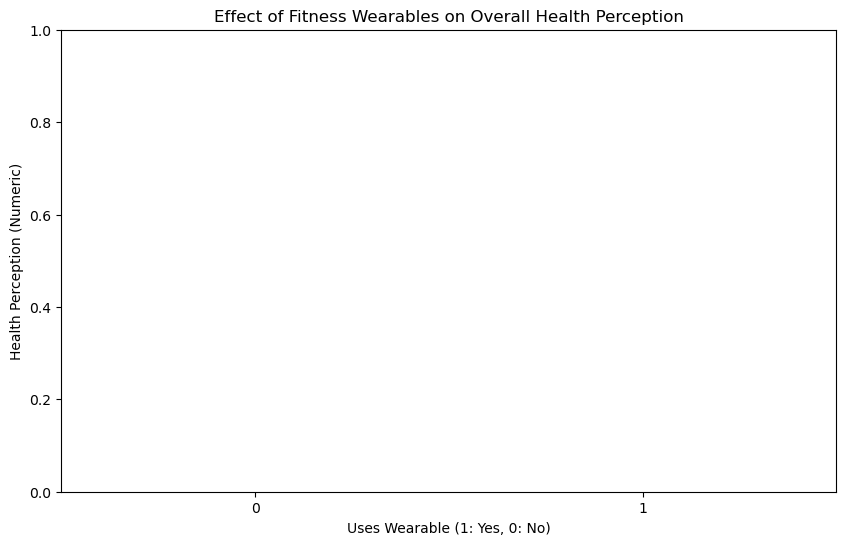

In [18]:
# Hypothesis 5: Effect of Fitness Wearables on Overall Health Perception
# Users of fitness wearables perceive their overall health to be better compared to non-users.

# Encode overall health perception for analysis

merged_data['health_perception_numeric'] = merged_data['how_healthy_do_you_consider_yourself?'].map(health_perception_mapping)
merged_data['uses_wearable'] = merged_data['how_long_have_you_been_using_a_fitness_wearable?'].apply(lambda x: 1 if pd.notna(x) else 0)

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='uses_wearable', y='health_perception_numeric')
plt.title('Effect of Fitness Wearables on Overall Health Perception')
plt.xlabel('Uses Wearable (1: Yes, 0: No)')
plt.ylabel('Health Perception (Numeric)')
plt.show()


In [ ]:
# Hypothesis 5 does not yield anything.